In [1]:
# 原始图像地址
import numpy as np
import cv2
from matplotlib import pyplot as plt
img_path="/home/wzc/zlt_self/ZNewMyModel/data/Drishti-GS/test/disc_small/image/gdrishtiGS_005.png"
# img_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/image/gdrishtiGS_003.png"
# img_path="/home/wzc/zlt_self/pOSAL-master/data/Drishti-GS/test/disc_small/image/gdrishtiGS_028.png"

In [2]:
img = cv2.imread(img_path)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
b,g,r = cv2.split(img)

In [3]:
def show_plt(imgs_tuple=(img_gray,b,g,r)):
    """ 图像显示。传参：图像元组 返回值：无 """
    out_imgs=np.hstack(imgs_tuple)
    out_imgs = cv2.cvtColor(out_imgs,cv2.COLOR_RGBA2BGR)
    plt.imshow(out_imgs)


def show_tuple(method_,imgs_tuple=(img_gray,b,g,r)):
    """ 显示处理后的图像。传参：图像处理方法；
        返回值：图像元组。
    """
    img_tuple=list()
    for x_ in imgs_tuple:
        img_tuple.append(method_(x_))
    show_plt(tuple(img_tuple))
    return img_tuple

1、求得血管
2、将所有通道的血管擦除
<!-- 3、遍历图片的每一行，在血管mask后的5个像素值的平均值，赋值给血管。 -->
3、
<!-- 3、计算r通道与g通道的像素差值 -->

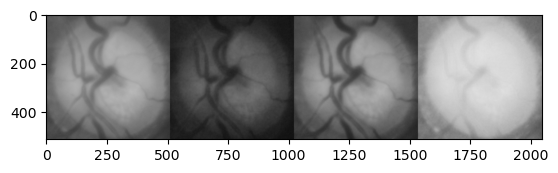

In [4]:
show_plt()

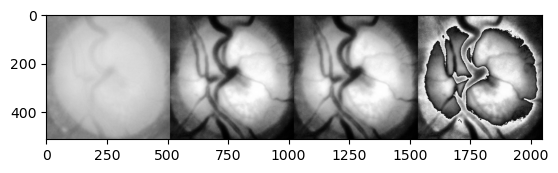

In [5]:
out_eq_g1=cv2.equalizeHist(g)
out_eq_g2=cv2.equalizeHist(out_eq_g1)
show_plt((r,out_eq_g1,out_eq_g2,out_eq_g2*2))

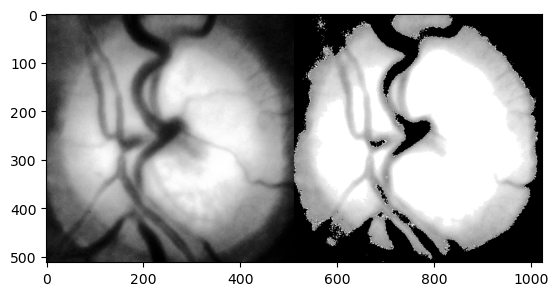

In [6]:
xx_img=out_eq_g1.copy()
for x in range(512):
    for y in range(512):
        if xx_img[x][y]>80 and xx_img[x][y]<180:
            xx_img[x][y]+=60
        elif(xx_img[x][y]<80):
            xx_img[x][y]=0
        else:
            xx_img[x][y]=255
show_plt((out_eq_g1,xx_img))


b_type<class 'numpy.ndarray'>,xx_img_type<class 'numpy.ndarray'>


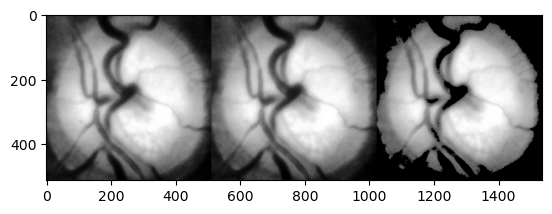

In [7]:
xx_img=out_eq_g1.copy()
b=np.where(xx_img > 80,xx_img,0)
print(f"b_type{type(b)},xx_img_type{type(xx_img)}")
show_plt((out_eq_g1,xx_img,b))


(Text(0.5, 1.0, 'img'), ([], []), ([], []))

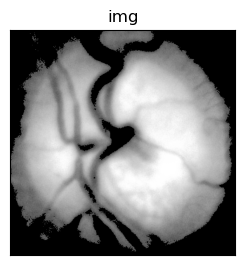

In [8]:
# encoding:utf-8
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = b.copy()
gray =img  # 灰度图像
gray=np.where(gray <10,gray,255)
# plt.imshow(gray)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('img'), plt.xticks([]), plt.yticks([])


(1, 1, 3)


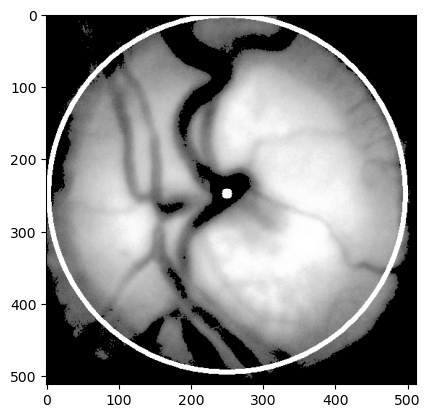

In [9]:
circle1 = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 300, param1=255, param2=10, minRadius=150, maxRadius=256)  #把半径范围缩小点，检测内圆，瞳孔
print(circle1.shape)
circles = circle1[0, :, :]  # 提取为二维
circles = np.uint16(np.around(circles))  # 四舍五入，取整
for i in circles[:]:
    cv2.circle(img, (i[0], i[1]), i[2], (255, 0, 0), 5)  # 画圆
    cv2.circle(img, (i[0], i[1]), 2, (255, 0, 0), 10)  # 画圆心

# plt.subplot(122), plt.imshow(img)
# plt.title('circle'), plt.xticks([]), plt.yticks([])
# plt.show()
show_plt((img,))

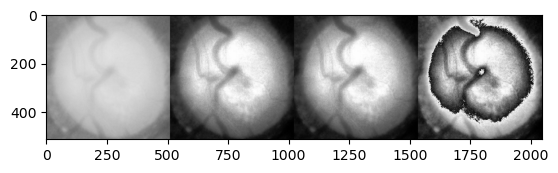

In [10]:
out_eq_1=cv2.equalizeHist(r)
out_eq_2=cv2.equalizeHist(out_eq_1)

show_plt((r,out_eq_1,out_eq_2,out_eq_2*2))


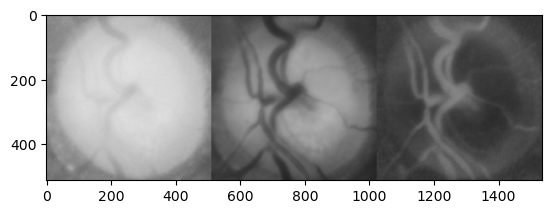

In [11]:
sub_=cv2.absdiff(r,g)
show_plt((r,g,sub_))

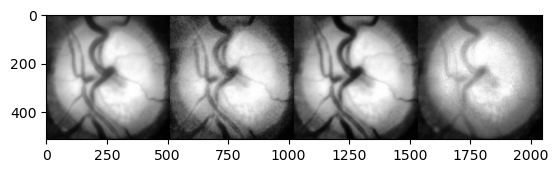

In [12]:
def equalizeH(img):
    out_=cv2.equalizeHist(img)
    return out_
oq_=show_tuple(equalizeH)

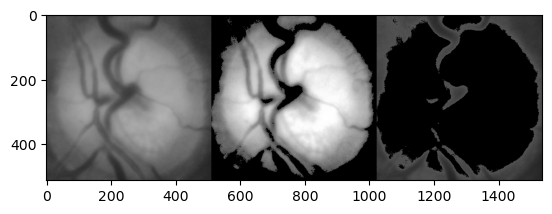

In [13]:
g_b_subtract=cv2.subtract(g,b)
show_plt((g,b,g_b_subtract))

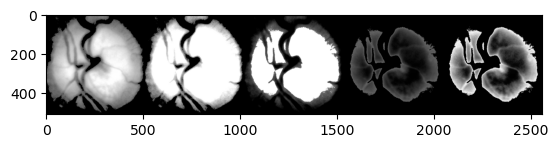

In [14]:
equ = cv2.equalizeHist(b)
equ = cv2.equalizeHist(equ)
equ1 = cv2.add(equ,b)
equ_21 = cv2.equalizeHist(equ1)
equ_2 = cv2.equalizeHist(equ_21)
equ_22=cv2.subtract(equ_2,b)
equ_23 = cv2.equalizeHist(equ_22)
show_plt((b,equ1,equ_2,equ_22,equ_23))

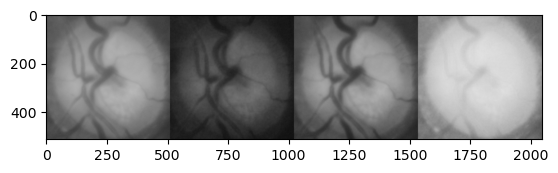

In [15]:
show_plt()

In [34]:
def extract_bv(image):		
	# b,green_fundus,r = cv2.split(image)
	clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
	contrast_enhanced_green_fundus = clahe.apply(image)

	# applying alternate sequential filtering (3 times closing opening)
	r1 = cv2.morphologyEx(contrast_enhanced_green_fundus, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
	R1 = cv2.morphologyEx(r1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)), iterations = 1)
	r2 = cv2.morphologyEx(R1, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
	R2 = cv2.morphologyEx(r2, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)), iterations = 1)
	r3 = cv2.morphologyEx(R2, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)
	R3 = cv2.morphologyEx(r3, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(23,23)), iterations = 1)	
	f4 = cv2.subtract(R3,contrast_enhanced_green_fundus)
	f5 = clahe.apply(f4)		
	
	# removing very small contours through area parameter noise removal
	ret,f6 = cv2.threshold(f5,15,255,cv2.THRESH_BINARY)	
	mask = np.ones(f5.shape[:2], dtype="uint8") * 255	
	contours, hierarchy = cv2.findContours(f6.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
	for cnt in contours:
		if cv2.contourArea(cnt) <= 200:
			cv2.drawContours(mask, [cnt], -1,0, -1)			
	im = cv2.bitwise_and(f5, f5, mask=mask)
	ret,fin = cv2.threshold(im,15,255,cv2.THRESH_BINARY_INV)			
	newfin = cv2.erode(fin, cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)), iterations=1)	

	# removing blobs of unwanted bigger chunks taking in consideration they are not straight lines like blood
	#vessels and also in an interval of area
	fundus_eroded = cv2.bitwise_not(newfin)	
	xmask = np.ones(fundus_eroded.shape[:2], dtype="uint8") * 255
	xcontours, xhierarchy = cv2.findContours(fundus_eroded.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)	
	for cnt in xcontours:
		shape = "unidentified"
		peri = cv2.arcLength(cnt, True)
		approx = cv2.approxPolyDP(cnt, 0.04 * peri, False)   				
		if len(approx) > 4 and cv2.contourArea(cnt) <= 3000 and cv2.contourArea(cnt) >= 100:
			shape = "circle"	
		else:
			shape = "veins"
		if(shape=="circle"):
			cv2.drawContours(xmask, [cnt], -1, 0, -1)	
	
	finimage = cv2.bitwise_and(fundus_eroded,fundus_eroded,mask=xmask)	
	blood_vessels = cv2.bitwise_not(finimage)
	for cnt in xcontours:
		cv2.drawContours(blood_vessels, [cnt], -1, 0,cv2.FILLED)	
	# 图像合集

	return blood_vessels,np.hstack((contrast_enhanced_green_fundus,r1,R1,r2)),np.hstack((R2,r3,R3,f4,f6))

In [37]:
out_tuple,hstack1,hstack2=extract_bv(img_gray)


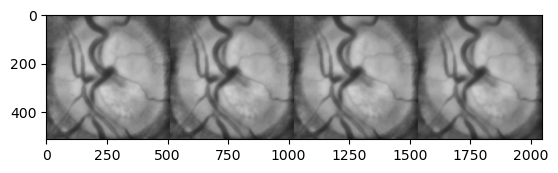

In [40]:
show_plt((hstack1,))

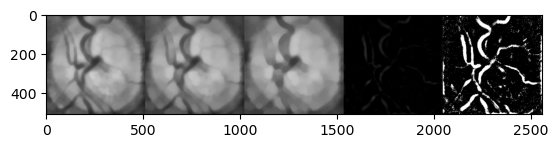

In [41]:
show_plt((hstack2,))

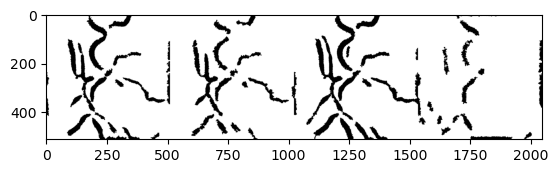

In [17]:
# out_tuple=show_tuple(extract_bv)


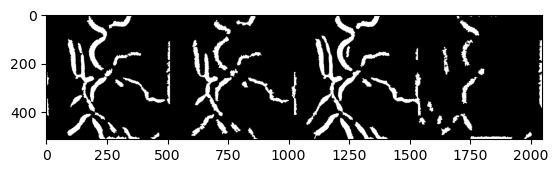

In [18]:
def binary_inv(img):
    _,out_img=cv2.threshold(img,111,255,cv2.THRESH_BINARY_INV)
    return out_img
binary_inv_imgs=show_tuple(binary_inv,out_tuple)

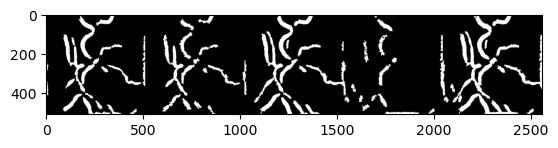

In [19]:
new_mask_=binary_inv_imgs[-1]
for i in binary_inv_imgs:
    new_mask_=cv2.add(new_mask_,i)
show_plt((binary_inv_imgs[0],binary_inv_imgs[1],binary_inv_imgs[2],binary_inv_imgs[3],new_mask_))

In [20]:
_,new_mask_1=cv2.threshold(new_mask_,111,255,cv2.THRESH_BINARY)

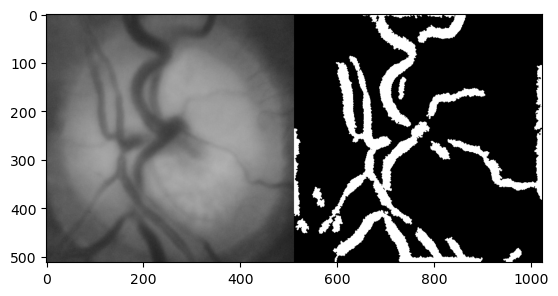

In [21]:
show_plt((g,new_mask_1,))

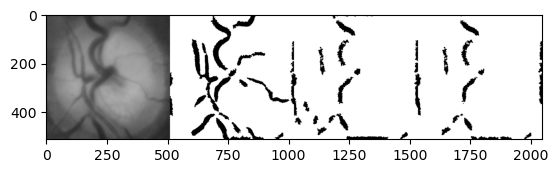

In [22]:
extract_bv_1=cv2.add(out_tuple[0],out_tuple[-1])
show_plt((g,out_tuple[0],out_tuple[-1],extract_bv_1))


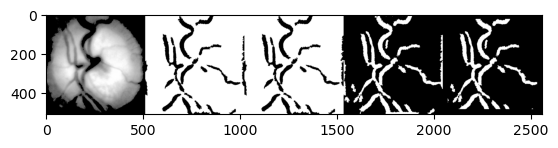

In [23]:
def padding_paint(img,padding_len=25,padding_color=255):
    b_copy=img.copy()
    b_shape=b_copy.shape[0]
    b_copy[:padding_len,:]=padding_color
    b_copy[:,:padding_len]=padding_color
    b_copy[b_shape-padding_len:,:]=padding_color
    b_copy[:,b_shape-padding_len:]=padding_color
    return b_copy
b_copy=out_tuple[0]
new_mask_11=padding_paint(new_mask_1,padding_len=25,padding_color=0)
show_plt((b,out_tuple[0],b_copy,new_mask_1,new_mask_11))

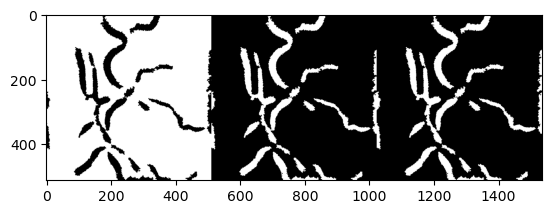

In [24]:
_,out_img=cv2.threshold(b_copy,111,255,cv2.THRESH_BINARY_INV)
out_img_eq=cv2.equalizeHist(out_img)
out_img_eq=cv2.equalizeHist(out_img_eq)
show_plt((b_copy,out_img,out_img_eq))

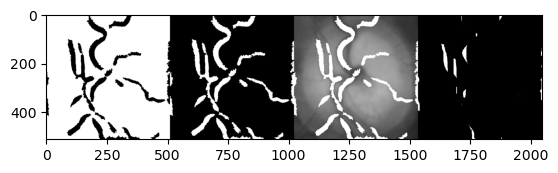

In [25]:
out_add_=cv2.add(out_img,g)
# 膨胀操作
kernel_2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 35)) # 卷积核变为4*4
dilate = cv2.erode(out_img, kernel_2)
show_plt((b_copy,out_img,out_add_,dilate))

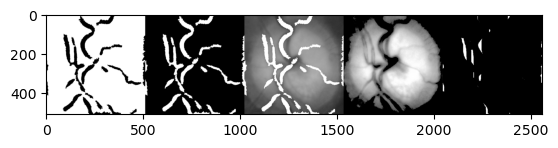

In [26]:
OUT_=cv2.inpaint(b,dilate,20,cv2.INPAINT_TELEA)
for i in range(5):

    OUT_=cv2.inpaint(OUT_,dilate,20,cv2.INPAINT_TELEA)
show_plt((b_copy,out_img,out_add_,OUT_,dilate))


In [27]:
out_img.shape

(512, 512)

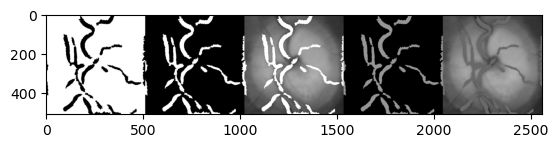

In [28]:
_,out_11_=cv2.threshold(out_img,11,150,cv2.THRESH_BINARY)
out_add_1=cv2.subtract(out_add_,out_11_)

show_plt((b_copy,out_img,out_add_,out_11_,out_add_1))


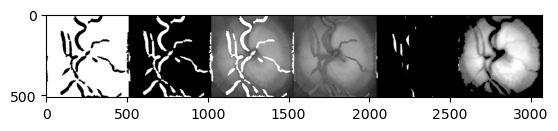

In [29]:
OUT_=cv2.inpaint(out_add_1,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
OUT_=cv2.inpaint(OUT_,dilate,30,cv2.INPAINT_TELEA)
show_plt((b_copy,out_img,out_add_,OUT_,dilate,b))

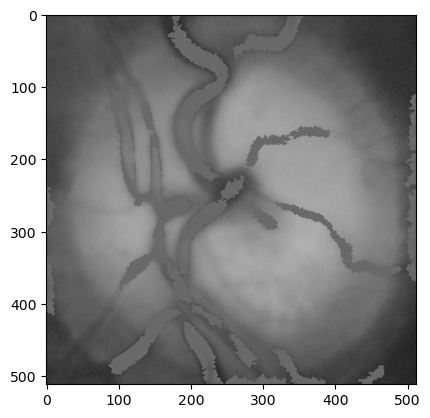

In [30]:
show_plt((OUT_,))

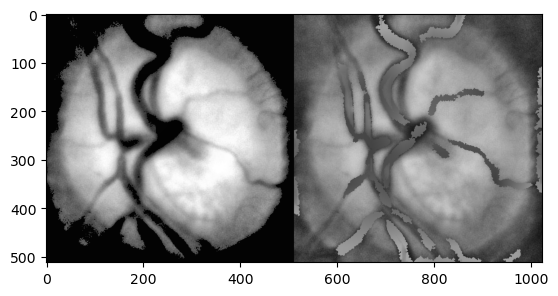

In [31]:
def cv_method_(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl1 = clahe.apply(img)
    return cl1
clahe_out_1=show_tuple(cv_method_,imgs_tuple=(b,OUT_))


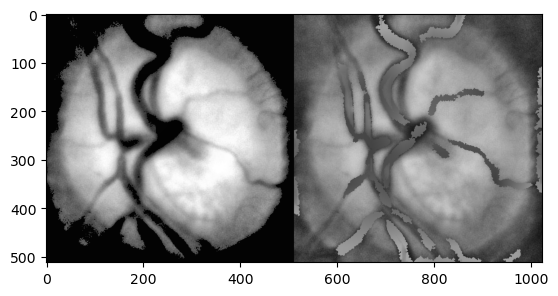

In [32]:
clahe_out_1=show_tuple(cv_method_,imgs_tuple=(b,OUT_))


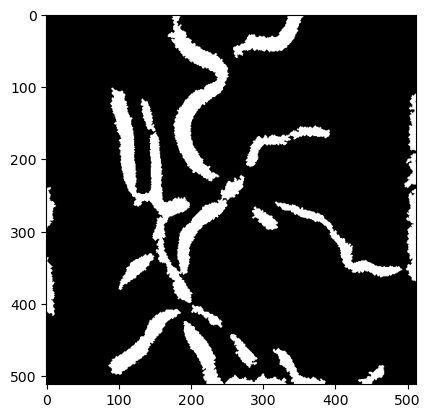

In [33]:
show_plt((out_img,))